# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import scipy
#from scipy import stats
from scipy.stats import linregress
#from scipy import stats

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print("done")

done


## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1870)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1870)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities and len(cities) < 666:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

666

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
weather_data = {"City":[],"Country":[],"Latitude":[],"Longitude":[],"Max Temp(F)":[],"Humidity%":[],"Cloudiness%":[],"Windspeed(MPH)":[],"Hemisphere":[]} 
setnum = 1
recnum = 1
for city in cities:
    response = requests.get(query_url + city)
    response_json = response.json()
    if response.status_code == 200:
        if recnum < 50:
            print(f"Processing Record {recnum} of Set {setnum} | {city}")
            recnum = recnum + 1
        else:
            print(f"Processing Record {recnum} of Set {setnum} | {city}")
            recnum = 1
            setnum = setnum + 1
        weather_data["City"].append(city)
        weather_data["Country"].append(response_json["sys"]["country"])
        weather_data["Latitude"].append(response_json["coord"]["lat"])
        weather_data["Longitude"].append(response_json["coord"]["lon"])
        weather_data["Max Temp(F)"].append(response_json["main"]["temp_max"])
        weather_data["Humidity%"].append(response_json["main"]["humidity"])
        weather_data["Cloudiness%"].append(response_json["clouds"]["all"])
        weather_data["Windspeed(MPH)"].append(response_json["wind"]["speed"])
        if response_json["coord"]["lat"] > 0:
            hemisphere = "North"
        if response_json["coord"]["lat"] <=0:
            hemisphere = "South"
        weather_data["Hemisphere"].append(hemisphere)
    else:
        print(f"City not found. Skipping...")

Processing Record 1 of Set 1 | geraldton
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | narrabri
Processing Record 6 of Set 1 | provideniya
Processing Record 7 of Set 1 | butaritari
City not found. Skipping...
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | mangrol
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | osakarovka
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | florianopolis
City not found. Skipping...
Processing Record 17 of Set 1 | jalu
Processing Record 18 of Set 1 | mosquera
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | nanortalik
Processing Record 21 of Set 1 | avera
Processing Record 22 of Set 1 | saint-philippe
Processing Record 23 of Set 1 | sao filip

Processing Record 40 of Set 4 | byron bay
Processing Record 41 of Set 4 | asau
City not found. Skipping...
Processing Record 42 of Set 4 | jaen
Processing Record 43 of Set 4 | yumen
Processing Record 44 of Set 4 | christiana
Processing Record 45 of Set 4 | turukhansk
Processing Record 46 of Set 4 | lavrentiya
Processing Record 47 of Set 4 | upernavik
Processing Record 48 of Set 4 | santa isabel do rio negro
City not found. Skipping...
Processing Record 49 of Set 4 | san jeronimo
Processing Record 50 of Set 4 | terenos
Processing Record 1 of Set 5 | totness
Processing Record 2 of Set 5 | madeji
Processing Record 3 of Set 5 | sivaki
Processing Record 4 of Set 5 | bilma
Processing Record 5 of Set 5 | hay river
Processing Record 6 of Set 5 | buzmeyin
Processing Record 7 of Set 5 | havoysund
City not found. Skipping...
Processing Record 8 of Set 5 | port lincoln
City not found. Skipping...
Processing Record 9 of Set 5 | kalemie
Processing Record 10 of Set 5 | vao
City not found. Skipping...

Processing Record 24 of Set 8 | namatanai
Processing Record 25 of Set 8 | svetlyy
Processing Record 26 of Set 8 | parana
Processing Record 27 of Set 8 | kerchevskiy
Processing Record 28 of Set 8 | illapel
Processing Record 29 of Set 8 | caravelas
Processing Record 30 of Set 8 | niscemi
Processing Record 31 of Set 8 | warrnambool
Processing Record 32 of Set 8 | raga
Processing Record 33 of Set 8 | oktyabrskoye
Processing Record 34 of Set 8 | purpe
Processing Record 35 of Set 8 | monrovia
Processing Record 36 of Set 8 | maku
Processing Record 37 of Set 8 | matola
Processing Record 38 of Set 8 | anloga
Processing Record 39 of Set 8 | lata
Processing Record 40 of Set 8 | vila velha
Processing Record 41 of Set 8 | la seyne-sur-mer
Processing Record 42 of Set 8 | tazmalt
Processing Record 43 of Set 8 | mana
Processing Record 44 of Set 8 | baruun-urt
Processing Record 45 of Set 8 | abu kamal
Processing Record 46 of Set 8 | takoradi
Processing Record 47 of Set 8 | puerto del rosario
Processing

Processing Record 12 of Set 12 | bagotville
Processing Record 13 of Set 12 | hameenlinna
Processing Record 14 of Set 12 | sioux lookout
Processing Record 15 of Set 12 | abu dhabi
Processing Record 16 of Set 12 | muroran
City not found. Skipping...
Processing Record 17 of Set 12 | tingo maria
Processing Record 18 of Set 12 | kozhevnikovo
Processing Record 19 of Set 12 | kroya
Processing Record 20 of Set 12 | sohag
Processing Record 21 of Set 12 | ko samui
City not found. Skipping...
Processing Record 22 of Set 12 | westlock
Processing Record 23 of Set 12 | conceicao do araguaia
Processing Record 24 of Set 12 | biu
Processing Record 25 of Set 12 | igarka
City not found. Skipping...
Processing Record 26 of Set 12 | cuauhtemoc
Processing Record 27 of Set 12 | vanavara
Processing Record 28 of Set 12 | coahuayana
Processing Record 29 of Set 12 | camana
Processing Record 30 of Set 12 | colesberg
Processing Record 31 of Set 12 | tambilil
Processing Record 32 of Set 12 | sambava
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df = pd.DataFrame(weather_data)
weather_df.to_csv("../output_data/cities.csv",encoding="utf-8",index=False)
weather_df.head(10)

,City,Country,Latitude,Longitude,Max Temp(F),Humidity%,Cloudiness%,Windspeed(MPH),Hemisphere
0,geraldton,AU,-28.77,114.60,82.40,14,0,24.16,South
1,iqaluit,CA,63.75,-68.51,35.60,80,90,16.11,North
2,busselton,AU,-33.65,115.33,69.01,38,5,14.76,South
3,bethel,US,41.37,-73.41,60.01,87,1,3.36,North
4,narrabri,AU,-30.32,149.78,66.20,36,0,11.41,South
5,provideniya,RU,64.38,-173.30,44.60,65,89,4.47,North
6,butaritari,KI,3.07,172.79,82.67,73,41,13.11,North
7,albany,US,42.60,-73.97,64.00,94,0,6.91,North
8,georgetown,MY,5.41,100.34,77.00,94,40,9.17,North
9,mangrol,IN,21.12,70.12,81.43,87,100,9.57,North


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_df.describe()
#No cities with humidity over 100%; moving along

,Latitude,Longitude,Max Temp(F),Humidity%,Cloudiness%,Windspeed(MPH)
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,19.352279,20.001131,64.782180,71.962295,49.995082,7.762574
std,33.377309,89.806496,14.874764,20.364661,40.495758,6.041103
min,-54.800000,-179.170000,17.010000,8.000000,0.000000,0.470000
25%,-9.042500,-59.340000,53.600000,62.000000,2.000000,3.400000
50%,22.925000,25.900000,65.145000,76.000000,47.500000,6.230000
75%,47.775000,96.320000,77.000000,88.000000,91.000000,10.290000
max,78.220000,179.320000,98.600000,100.000000,100.000000,51.670000


In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

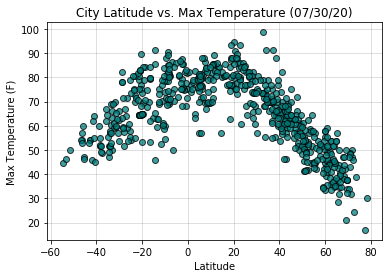

In [39]:
plt.scatter(weather_df["Latitude"],weather_df["Max Temp(F)"],color="teal",edgecolor="black",marker="o",alpha=0.75)
plt.title("City Latitude vs. Max Temperature (07/30/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(color='black', linestyle='-', linewidth=0.5,alpha=0.25)
plt.savefig('../Images/scat_latvstemp.png')
plt.show()

## Latitude vs. Humidity Plot

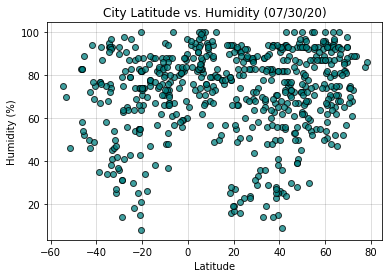

In [27]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity%"],color="teal",edgecolor="black",marker="o",alpha=0.75)
plt.title("City Latitude vs. Humidity (07/30/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(color='black', linestyle='-', linewidth=0.5,alpha=0.25)
plt.savefig('../Images/scat_latvshumid.png')
plt.show()

## Latitude vs. Cloudiness Plot

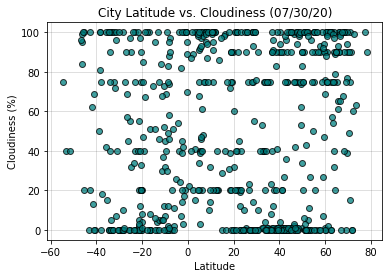

In [28]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness%"],color="teal",edgecolor="black",marker="o",alpha=0.75)
plt.title("City Latitude vs. Cloudiness (07/30/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig('../Images/scat_latvscloud.png')
plt.grid(color='black', linestyle='-', linewidth=0.5,alpha=0.25)
plt.show()

## Latitude vs. Wind Speed Plot

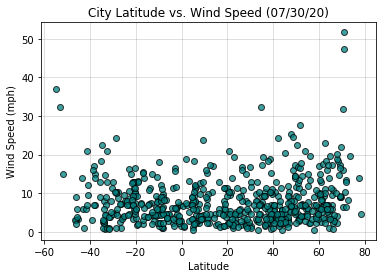

In [29]:
plt.scatter(weather_df["Latitude"],weather_df["Windspeed(MPH)"],color="teal",edgecolor="black",marker="o",alpha=0.75)
plt.title("City Latitude vs. Wind Speed (07/30/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig('../Images/scat_latvswind.png')
plt.grid(color='black', linestyle='-', linewidth=0.5,alpha=0.25)
plt.show()

## Linear Regression

In [78]:
def regress(x,y,title,xlab,ylab,vs):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.min(),y.min()),fontsize=15,color="red")
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    if title == "Northern Hemisphere":
        hemisphere = "north"
    else:
        hemisphere = "south"
    savename = (f"../Images/reg_latvs{vs}_{hemisphere}")
    plt.savefig(savename)
    print(f"The r-squared is: {rvalue**2}")

In [65]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_df.loc[weather_df["Hemisphere"]=="North"]
south_df = weather_df.loc[weather_df["Hemisphere"]=="South"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7129420655566056


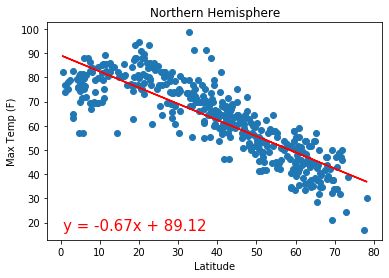

In [80]:
regress(north_df['Latitude'],north_df['Max Temp(F)'],"Northern Hemisphere","Latitude","Max Temp (F)","temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4608189534345649


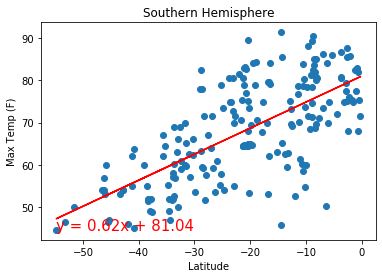

In [82]:
regress(south_df['Latitude'],south_df['Max Temp(F)'],"Southern Hemisphere","Latitude","Max Temp (F)","temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00027542634356269034


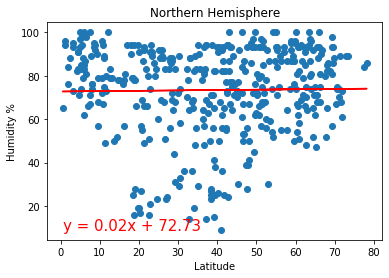

In [83]:
regress(north_df['Latitude'],north_df['Humidity%'],"Northern Hemisphere","Latitude","Humidity %","humid")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.029473395131406274


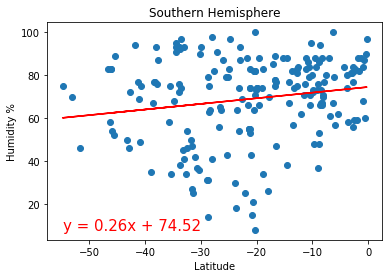

In [84]:
regress(south_df['Latitude'],south_df['Humidity%'],"Southern Hemisphere","Latitude","Humidity %","humid")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005418350286172258


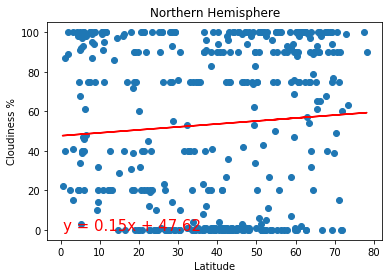

In [85]:
regress(north_df['Latitude'],north_df['Cloudiness%'],"Northern Hemisphere","Latitude","Cloudiness %","cloud")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0032985934376997465


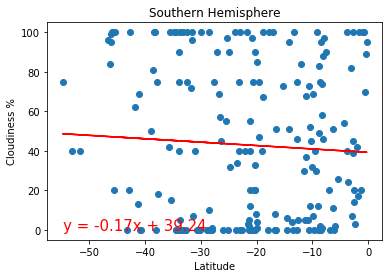

In [86]:
regress(south_df['Latitude'],south_df['Cloudiness%'],"Southern Hemisphere","Latitude","Cloudiness %","cloud")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04199950627384663


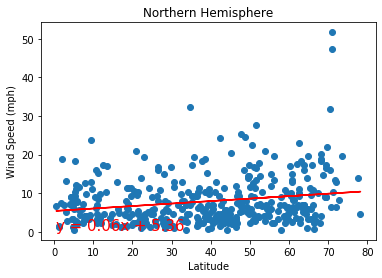

In [87]:
regress(north_df['Latitude'],north_df['Windspeed(MPH)'],"Northern Hemisphere","Latitude","Wind Speed (mph)","wind")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.068759957675699


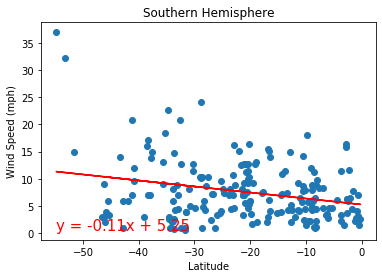

In [88]:
regress(south_df['Latitude'],south_df['Windspeed(MPH)'],"Southern Hemisphere","Latitude","Wind Speed (mph)","wind")